In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from Net import Net
from utils import train, test, plt_graph

In [2]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
            Conv2d-3           [-1, 32, 24, 24]           4,608
              ReLU-4           [-1, 32, 24, 24]               0
            Conv2d-5           [-1, 64, 26, 26]           2,048
              ReLU-6           [-1, 64, 26, 26]               0
            Conv2d-7          [-1, 128, 26, 26]          73,728
              ReLU-8          [-1, 128, 26, 26]               0
         MaxPool2d-9          [-1, 128, 13, 13]               0
           Conv2d-10          [-1, 256, 11, 11]         294,912
             ReLU-11          [-1, 256, 11, 11]               0
           Conv2d-12            [-1, 256, 9, 9]         589,824
             ReLU-13            [-1, 256, 9, 9]               0
           Conv2d-14            [-1, 25

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 20):
    train_acc,train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
    test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)

Train: Loss=2.3017 Batch_id=468 Accuracy=11.34: 100%|██████████| 469/469 [00:26<00:00, 17.77it/s]


Test set: Average loss: 0.0182, Accuracy: 974/10000 (9.74%)

0.01 2


Train: Loss=2.3025 Batch_id=468 Accuracy=12.64: 100%|██████████| 469/469 [00:21<00:00, 21.44it/s]


Test set: Average loss: 0.0182, Accuracy: 1010/10000 (10.10%)

0.01 3


Train: Loss=0.3059 Batch_id=468 Accuracy=40.31: 100%|██████████| 469/469 [00:21<00:00, 21.36it/s]


Test set: Average loss: 0.0017, Accuracy: 9318/10000 (93.18%)

0.01 4


Train: Loss=0.0744 Batch_id=468 Accuracy=95.05: 100%|██████████| 469/469 [00:22<00:00, 21.24it/s]


Test set: Average loss: 0.0008, Accuracy: 9696/10000 (96.96%)

0.01 5


Train: Loss=0.0532 Batch_id=468 Accuracy=97.53: 100%|██████████| 469/469 [00:22<00:00, 21.11it/s]


Test set: Average loss: 0.0004, Accuracy: 9834/10000 (98.34%)

0.01 6


Train: Loss=0.0530 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]


Test set: Average loss: 0.0003, Accuracy: 9875/10000 (98.75%)

0.01 7


Train: Loss=0.0363 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:22<00:00, 21.02it/s]


Test set: Average loss: 0.0003, Accuracy: 9875/10000 (98.75%)

0.01 8


Train: Loss=0.0810 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:23<00:00, 20.12it/s]


Test set: Average loss: 0.0003, Accuracy: 9891/10000 (98.91%)

0.01 9


Train: Loss=0.0207 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s]


Test set: Average loss: 0.0003, Accuracy: 9850/10000 (98.50%)

0.01 10


Train: Loss=0.0169 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.67it/s]


Test set: Average loss: 0.0003, Accuracy: 9865/10000 (98.65%)

0.01 11


Train: Loss=0.0565 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:22<00:00, 20.66it/s]


Test set: Average loss: 0.0002, Accuracy: 9914/10000 (99.14%)

0.01 12


Train: Loss=0.0528 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:23<00:00, 20.35it/s]


Test set: Average loss: 0.0003, Accuracy: 9871/10000 (98.71%)

0.01 13


Train: Loss=0.0016 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:23<00:00, 19.55it/s]


Test set: Average loss: 0.0002, Accuracy: 9908/10000 (99.08%)

0.01 14


Train: Loss=0.0047 Batch_id=468 Accuracy=99.56: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]


Test set: Average loss: 0.0002, Accuracy: 9906/10000 (99.06%)

0.01 15


Train: Loss=0.0019 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]


Test set: Average loss: 0.0002, Accuracy: 9909/10000 (99.09%)

0.01 16


Train: Loss=0.0001 Batch_id=468 Accuracy=99.70: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]


Test set: Average loss: 0.0003, Accuracy: 9900/10000 (99.00%)

0.01 17


Train: Loss=0.0000 Batch_id=468 Accuracy=99.70: 100%|██████████| 469/469 [00:22<00:00, 21.17it/s]


Test set: Average loss: 0.0003, Accuracy: 9907/10000 (99.07%)

0.01 18


Train: Loss=0.0024 Batch_id=468 Accuracy=99.76: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]


Test set: Average loss: 0.0002, Accuracy: 9919/10000 (99.19%)

0.01 19


Train: Loss=0.0383 Batch_id=468 Accuracy=99.76: 100%|██████████| 469/469 [00:22<00:00, 20.90it/s]


Test set: Average loss: 0.0003, Accuracy: 9906/10000 (99.06%)

0.01 20


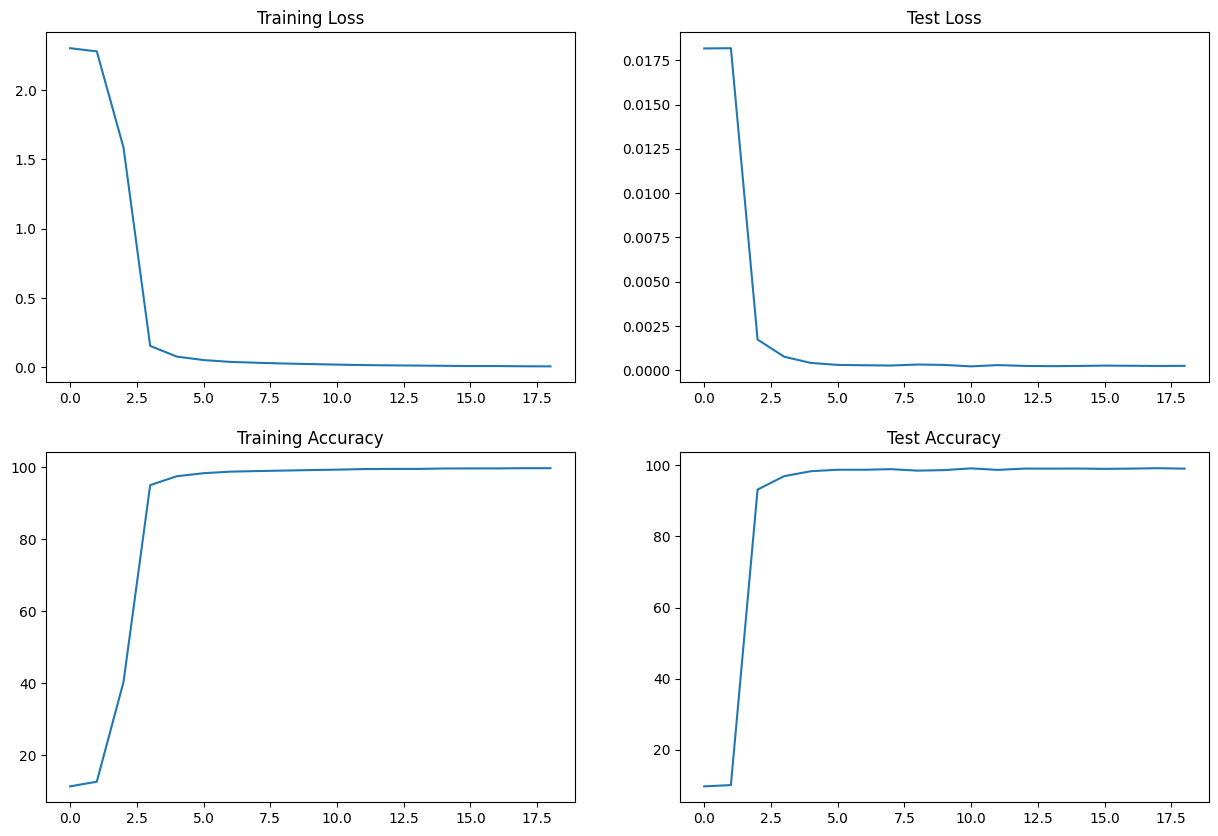

In [5]:
plt_graph(train_losses,test_losses,train_acc,test_acc)